<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Nikoo Moradi

**Student ID**: 400101934





## Importing Libraries

First we import libraries that we need for this assignment.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# import any other libraries needed below


## Reading Data and Preprocessing

In this section, we want to read data from a CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the features of the data (`X1`, `X2`, `X3`) and the class (`Y`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [ ]:
X, Y = None, None

### START CODE HERE ###
df = pd.read_csv('/content/data3_logistic.csv')
print(df.shape)
print(df.info())
print(df.columns)

X = df.drop('Y',axis = 1)
Y = df["Y"]


### END CODE HERE ###

print(X.shape)
print(Y.shape)

(10000, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      10000 non-null  float64
 1   X2      10000 non-null  float64
 2   X3      10000 non-null  float64
 3   Y       10000 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 312.6 KB
None
Index(['X1', 'X2', 'X3', 'Y'], dtype='object')
(10000, 3)
(10000,)


Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

**Question**: Briefly explain why we need to normalize our data before starting the training.

**Answer**:
_____
Normalizing the data helps in achieving faster convergence during the training process. It ensures that all features have similar scales, preventing some features from dominating others, which can lead to biased learning. Additionally, normalization can make the optimization algorithm more stable and can help prevent numerical overflow or underflow issues.
_____

In [ ]:
### START CODE HERE ###
X_col_means = np.mean(X, axis=0)
print(X_col_means)
X_col_std = np.std(X, axis=0)
print(X_col_std)

X = (X - X_col_means)/X_col_std

### END CODE HERE ###

X1    403.996923
X2     28.790204
X3     24.446095
dtype: float64
X1    289.073148
X2     79.486724
X3     40.854263
dtype: float64


Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [ ]:
### START CODE HERE ###
bias = np.ones((X.shape[0],1))
X.insert(0, 'bias', 1)

### END CODE HERE ###

print(X.shape)
print(X)

(10000, 4)
      bias        X1        X2        X3
0        1 -1.493255 -1.169104 -0.832399
1        1 -0.875916 -0.750951  0.961525
2        1  0.723119  0.332156 -0.707816
3        1  1.052900 -0.149101  0.642972
4        1  0.769855  0.016314  0.769466
...    ...       ...       ...       ...
9995     1 -1.328965 -1.254817 -0.168696
9996     1  1.060871 -1.719050 -0.059901
9997     1 -0.608670  0.515147 -1.440228
9998     1  0.291258  0.252868 -1.970691
9999     1 -1.714366  1.222658 -0.131426

[10000 rows x 4 columns]


## Training Model

### Sigmoid Function
You should begin by implementing the $\sigma(\mathbf{x})$ function. Recall that the logistic regression hypothesis $\mathcal{h}()$ is defined as:
$$
\mathcal{h}_{\theta}(\mathbf{x}) = \mathcal{g}(\theta^\mathbf{T}\mathbf{x})
$$
where $\mathcal{g}()$ is the sigmoid function as:
$$
\mathcal{g}(\mathbf{z}) = \frac{1}{1+exp^{-\mathbf{z}}}
$$
The Sigmoid function has the property that $\mathbf{g}(+\infty)\approx 1$ and $\mathcal{g}(−\infty)\approx0$. Test your function by calling `sigmoid(z)` on different test samples. Be certain that your sigmoid function works with both vectors and matrices - for either a vector or a matrix, your function should perform the sigmoid function on every element.

In [ ]:
def sigmoid(Z):
    '''
    Applies the sigmoid function on every element of Z
    Arguments:
        Z can be a (n,) vector or (n , m) matrix
    Returns:
        A vector/matrix, same shape with Z, that has the sigmoid function applied elementwise
    '''
    ### START CODE HERE ###
    return 1 / (1 + np.exp(-Z))

    ### END CODE HERE ###

### Cost Function
Implement the functions to compute the cost function. Recall the cost function for logistic regression is a scalar value given by:
$$
\mathcal{J}(\theta) = \sum_{i=1}^{n}[-y^{(i)}\log{(\mathcal{h}_\theta(\mathbf{x}^{(i)}))}-(1-y^{(i)})\log{(1-\mathcal{h}_\theta(\mathbf{x}^{(i)}))}] + \frac{\lambda}{2}||\theta||_2^2
$$

In [ ]:
def computeCost(theta, X, y, regLambda):
    '''
    Computes the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        a scalar value of the cost  ** make certain you're not returning a 1 x 1 matrix! **
    '''

    m, n = X.shape
    loss = None
    ### START CODE HERE ###
    z = np.dot(X, theta)
    h = sigmoid(z)

    term1 = y* np.log(h)
    term2 = (1 - y) * np.log(1 - h)
    loss = -np.sum(term1 + term2) / m

    reg_cost = (regLambda / (2 * m)) * np.sum(theta[1:]**2)


    loss = loss + reg_cost


    ### END CODE HERE ###
    return loss

### Gradient of the Cost Function
Now, we want to calculate the gradient of the cost function. The gradient of the cost function is a d-dimensional vector.\
We must be careful not to regularize the $\theta_0$ parameter (corresponding to the first feature we add to each instance), and so the 0's element is given by:
$$
\frac{\partial \mathcal{J}(\theta)}{\partial \theta_0} = \sum_{i=1}^n (\mathcal{h}_\theta(\mathbf{x}^{(i)})-y^{(i)})
$$

Question: What is the answer to this problem for the $j^{th}$ element (for $j=1...d$)?

Answer:

---

The answer to this problem for the $(j^{th})$ element (for \(j=1...d\)) of the gradient of the logistic regression cost function, where the regularization is included for $(j \geq 1)$, is given by:

$$\frac{\partial \mathcal{J}(\theta)}{\partial \theta_j} = \left( \frac{1}{m} \sum_{i=1}^n (\mathcal{h}_\theta(\mathbf{x}^{(i)}) - y^{(i)}) x^{(i)}_j \right) + \frac{\lambda}{m} \theta_j $$

This formula indicates that the gradient for each parameter $(\theta_j)$ consists of two parts:
1. **Prediction Error Contribution:** The average over all training examples of the product of the prediction error $(\mathcal{h}_\theta(\mathbf{x}^{(i)}) - y^{(i)})$ and the feature value $x^{(i)}_j$.
2. **Regularization Term:** The regularization term, $\frac{\lambda}{m} \theta_j$, which penalizes the magnitude of $\theta_j$ to avoid overfitting. This term does not apply to $\theta_0$, ensuring that the bias term is not regularized.

---



In [ ]:
def computeGradient(theta, X, y, regLambda):
    '''
    Computes the gradient of the objective function
    Arguments:
        theta is d-dimensional numpy vector
        X is a n-by-d numpy matrix
        y is an n-dimensional numpy vector
        regLambda is the scalar regularization constant
    Returns:
        the gradient, an d-dimensional vector
    '''

    m, n = X.shape
    grad = None
    ### START CODE HERE ###

    z = np.dot(X, theta)
    h = sigmoid(z)

    error = (h - y)/m

    grad = np.dot(X.T, error)

    reg_term = (regLambda / m) * theta
    reg_term[0] = 0

    grad += reg_term

    ### END CODE HERE ###
    return grad

### Training and Prediction
Once you have the cost and gradient functions complete, implemen tthe fit and predict methods.\
Your fit method should train the model via gradient descent, relying on the cost and gradient functions. This function should return two parameters. The first parameter is $\theta$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code.\
Instead of simply running gradient descent for a specific number of iterations, we will use a more sophisticated method: we will stop it after the solution hasconverged. Stop the gradient descent procedure when $\theta$ stops changing between consecutive iterations. You can detect this convergence when:
$$
||\theta_{new}-\theta_{old}||_2 <= \epsilon,
$$
for some small $\epsilon$ (e.g, $\epsilon=10E-4$).\
For readability, we’d recommend implementing this convergence test as a dedicated function `hasConverged`.

In [ ]:
def fit(X, y, regLambda = 0.01, alpha = 0.01, epsilon = 1e-4, maxNumIters = 100):
    '''
    Trains the model
    Arguments:
        X           is a n-by-d numpy matrix
        y           is an n-dimensional numpy vector
        maxNumIters is the maximum number of gradient descent iterations
        regLambda   is the scalar regularization constant
        epsilon     is the convergence rate
        alpha       is the gradient descent learning rate
    '''

    m, n = X.shape
    theta, loss_history = None, None
    ### START CODE HERE ###
    theta = np.zeros(n)
    loss_history = []

    for _ in range(maxNumIters):
        theta_old = np.copy(theta)
        gradient = computeGradient(theta, X, y, regLambda)
        theta -= alpha * gradient
        loss = computeCost(theta, X, y, regLambda)
        loss_history.append(loss)

        if hasConverged(theta_old, theta, epsilon):
            break

    ### END CODE HERE ###
    return theta, loss_history




def hasConverged(theta_old, theta_new, epsilon):
    '''
    Return if the theta converged or not
    Arguments:
        theta_old   is the theta calculated in prevoius iteration
        theta_new   is the theta calculated in current iteration
        epsilon     is the convergence rate
    '''

    ### START CODE HERE ###
    e = np.linalg.norm(theta_new - theta_old, 2)
    if e <= epsilon:
      return True
    else:
      return False
    ### END CODE HERE ###


Finally, we want to evaluate our loss for this problem. Complete the cell below to calculate and print the loss of each iteration and the final theta of your model.

In [ ]:
theta, loss_history = fit(X, Y) # calculating theta and loss of each iteration

### START CODE HERE ###

for i, loss in enumerate(loss_history):
    print(f"Iteration {i+1}: Loss = {loss}")

print(f"Final theta: {theta}")

### END CODE HERE ###

Iteration 1: Loss = 0.6916080637617288
Iteration 2: Loss = 0.6900767197648195
Iteration 3: Loss = 0.688553109129314
Iteration 4: Loss = 0.6870371924712132
Iteration 5: Loss = 0.6855289304654586
Iteration 6: Loss = 0.6840282838489138
Iteration 7: Loss = 0.6825352134232974
Iteration 8: Loss = 0.6810496800580603
Iteration 9: Loss = 0.6795716446932114
Iteration 10: Loss = 0.6781010683420922
Iteration 11: Loss = 0.6766379120940973
Iteration 12: Loss = 0.6751821371173446
Iteration 13: Loss = 0.6737337046612927
Iteration 14: Loss = 0.6722925760593064
Iteration 15: Loss = 0.6708587127311715
Iteration 16: Loss = 0.669432076185557
Iteration 17: Loss = 0.6680126280224278
Iteration 18: Loss = 0.666600329935405
Iteration 19: Loss = 0.6651951437140757
Iteration 20: Loss = 0.6637970312462537
Iteration 21: Loss = 0.6624059545201885
Iteration 22: Loss = 0.6610218756267254
Iteration 23: Loss = 0.6596447567614165
Iteration 24: Loss = 0.6582745602265805
Iteration 25: Loss = 0.6569112484333165
Iteration 26

### Testing Your Implementation
To test your logistic regression implementation, first you should use `train_test_split` function to split dataset into three parts:

- 70% for the training set
- 20% for the validation set
- 10% for the test set

Do this in the cell below.

In [ ]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = None, None, None, None, None, None

### START CODE HERE ###

X_train, X_temp, Y_train, Y_temp = train_test_split(X,Y, test_size=0.3, random_state= 42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=1/3, random_state = 93)

print("Train set : ",X_train.shape, Y_train.shape)
print("Temperary set : ",X_temp.shape, Y_temp.shape)
print("Validation set : ",X_val.shape, Y_val.shape)
print("Test set : ",X_test.shape, Y_test.shape)

### END CODE HERE ###

Train set :  (7000, 4) (7000,)
Temperary set :  (3000, 4) (3000,)
Validation set :  (2000, 4) (2000,)
Test set :  (1000, 4) (1000,)


Then, you should complete `predict` function to find the weight vector and the loss on the test data.

In [ ]:
def predict(X, theta):
    '''
    Use the model to predict values for each instance in X
    Arguments:
        theta is d-dimensional numpy vector
        X     is a n-by-d numpy matrix
    Returns:
        an n-dimensional numpy vector of the predictions, the output should be binary (use h_theta > .5)
    '''

    Y = None

    ### START CODE HERE ###
    Z = np.dot(X, theta)
    h_theta = sigmoid(Z)

    Y = (h_theta > 0.5).astype(int)

    ### END CODE HERE ###
    return Y

Now, run the `fit` and `predict` function for different values of the learning rate and regularization constant. Plot the `loss_history` of these different values for train and test data both in the same figure.

**Question**: Discuss the effect of the learning rate and regularization constant and find the best values of these parameters.

**Answer**:
_____
**Effects of Learning Rate and Regularization:**

*   **Learning Rate (α)**: Higher learning rates can lead to faster convergence but might overshoot the minimum, potentially causing divergence in loss during training. Lower learning rates ensure more stable convergence but might take many iterations to reach the minimum.
*   **Regularization Constant (λ)**: Higher values of the regularization constant reduce overfitting by penalizing large weights but might lead to underfitting if set too high. Lower values may not adequately prevent overfitting.

**Finding the Best Values:**

*   Plotting the loss histories as described above can visually assist in determining which combinations of α\\alphaα and λ\\lambdaλ provide a good balance between convergence speed, stability, and generalization (as indicated by test loss). The "best" values will be those that result in the lowest test loss without showing signs of overfitting (where train loss is much lower than test loss).

------

In [ ]:
learning_rates = [0.001, 0.01, 0.1,1,2,5]
regularization_constants = [0.001, 0.1,1]

# Initialize a dictionary to store the combinations
combo_dict = {}

# Assign a unique number to each combination
combo_num = 1
for lr in learning_rates:
    for reg_const in regularization_constants:
        combo_dict[(lr, reg_const)] = combo_num
        combo_num += 1

# Access all combo numbers through combo_dict
combo_nums = np.array(list(combo_dict.values()))
print("All Combo Numbers:", combo_nums)

# Print the dictionary
print("Combinations:")
for combo, num in combo_dict.items():
    print(f"Combo {num}: Learning Rate = {combo[0]}, Regularization Constant = {combo[1]}")

All Combo Numbers: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
Combinations:
Combo 1: Learning Rate = 0.001, Regularization Constant = 0.001
Combo 2: Learning Rate = 0.001, Regularization Constant = 0.1
Combo 3: Learning Rate = 0.001, Regularization Constant = 1
Combo 4: Learning Rate = 0.01, Regularization Constant = 0.001
Combo 5: Learning Rate = 0.01, Regularization Constant = 0.1
Combo 6: Learning Rate = 0.01, Regularization Constant = 1
Combo 7: Learning Rate = 0.1, Regularization Constant = 0.001
Combo 8: Learning Rate = 0.1, Regularization Constant = 0.1
Combo 9: Learning Rate = 0.1, Regularization Constant = 1
Combo 10: Learning Rate = 1, Regularization Constant = 0.001
Combo 11: Learning Rate = 1, Regularization Constant = 0.1
Combo 12: Learning Rate = 1, Regularization Constant = 1
Combo 13: Learning Rate = 2, Regularization Constant = 0.001
Combo 14: Learning Rate = 2, Regularization Constant = 0.1
Combo 15: Learning Rate = 2, Regularization Constant = 1
Combo 16

[91.3, 91.3, 91.3, 91.3, 91.3, 91.3, 91.5, 91.5, 91.5, 91.10000000000001, 91.10000000000001, 91.10000000000001, 91.2, 91.2, 91.2, 91.2, 91.2, 91.2]

Best Model : 7 
Learning rate =  0.1 
Regularization Constant =  0.001


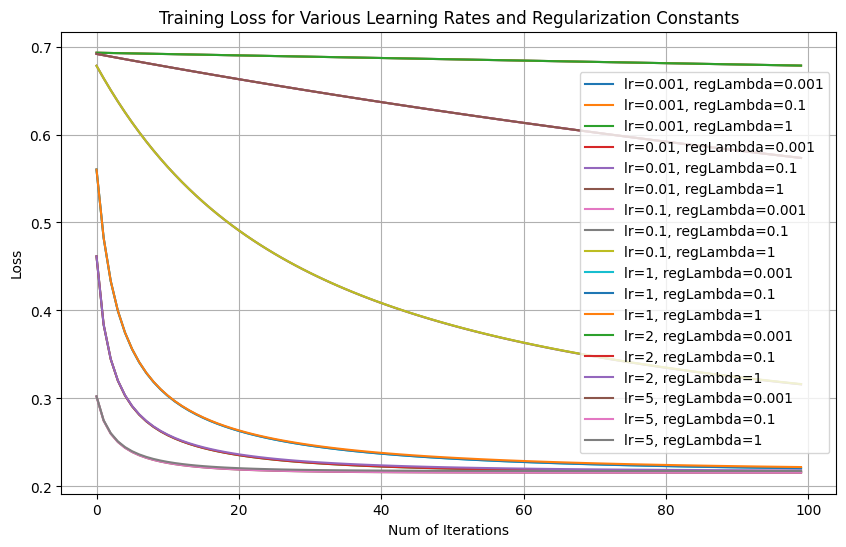

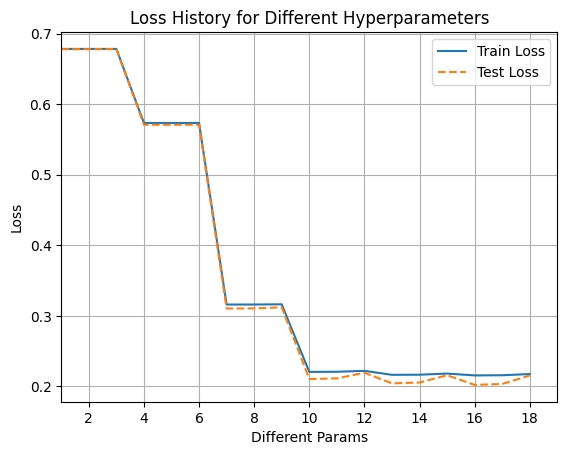

In [ ]:


### START CODE HERE ###


train_loss_history = []
test_loss_history = []
plt.figure(figsize=(10,6))

best_model = None
accuracies = []
lr_best_accuracy = 0
best_combo = None
best_test_loss = float('inf')
model_num = 0

for alpha in learning_rates:
    for regLambda in regularization_constants:
        model_num += 1
        theta, loss_history_train = fit(X_train, Y_train, regLambda=regLambda, alpha=alpha)

        Y_train_pred = predict(X_train, theta)
        Y_test_pred = predict(X_test, theta)
        lr_accuracy = accuracy_score(Y_test, Y_test_pred)
        accuracies.append(lr_accuracy*100)

        train_loss = computeCost(theta, X_train, Y_train, regLambda)
        test_loss = computeCost(theta, X_test, Y_test, regLambda)

        train_loss_history.append(train_loss)
        test_loss_history.append(test_loss)

        plt.plot(loss_history_train, label=f"lr={alpha}, regLambda={regLambda}")


        #finding the best model
        if lr_accuracy > lr_best_accuracy:
            lr_best_accuracy = lr_accuracy
            best_model = theta
            best_combo = (model_num,alpha, regLambda)

print(accuracies)
print("\nBest Model :", best_combo[0],"\nLearning rate = ",best_combo[1],"\nRegularization Constant = ",best_combo[2])

plt.title('Training Loss for Various Learning Rates and Regularization Constants')
plt.xlabel('Num of Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


plt.plot(combo_nums,train_loss_history, label='Train Loss')
plt.plot(combo_nums,test_loss_history, label='Test Loss',linestyle='--')
plt.xlabel('Different Params')
plt.ylabel('Loss')
plt.title('Loss History for Different Hyperparameters')
plt.xlim([1,combo_num])
plt.legend()
plt.grid()
plt.show()


### END CODE HERE ###

## Naive Bayes

In this part, you will use the `GaussianNB` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**: 89.6 %

In [ ]:
### START CODE HERE ###
print(X_train.shape)
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, Y_train)

Y_pred = nb_classifier.predict(X_test)

nb_accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy of GaussianNB classifier on test set:", nb_accuracy*100)

### END CODE HERE ###

(7000, 4)
Accuracy of GaussianNB classifier on test set: 89.60000000000001


## LDA (Linear Discriminant Analysis)

In this part, you will use the `LinearDiscriminantAnalysis` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**: 91.3 %

In [ ]:
### START CODE HERE ###
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train, Y_train)

Y_pred = lda_classifier.predict(X_test)

lda_accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy of LDA  classifier on test set:", lda_accuracy*100)

### END CODE HERE ###

Accuracy of LDA  classifier on test set: 91.3


## Conclution

**Question**: What is the best method for classifying this dataset? What is the best accuracy on the test set?

**Answer**:

Best method for classifying the dataset: Logistic Regression

Best accuracy on the test set: 91.5 %


In [ ]:
accuracies = {'Logistic Regression': lr_best_accuracy, 'Gaussian Naive Bayes': nb_accuracy, 'LDA': lda_accuracy}
best_method = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_method]

print("Accuracy of the best Logistic Regression on test set:", lr_best_accuracy*100, "\nBest Learning rate = ",best_combo[1],"\nBest Regularization Constant = ",best_combo[2])
print("\nAccuracy of GaussianNB on test set:", nb_accuracy*100)
print("\nAccuracy of LDA on test set:", lda_accuracy*100)
print("\nBest method for classifying the dataset:", best_method)
print("Best accuracy on the test set:", best_accuracy*100)

Accuracy of the best Logistic Regression on test set: 91.5 
Best Learning rate =  0.1 
Best Regularization Constant =  0.001

Accuracy of GaussianNB on test set: 89.60000000000001

Accuracy of LDA on test set: 91.3

Best method for classifying the dataset: Logistic Regression
Best accuracy on the test set: 91.5
